In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import icecream as ic

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torchvision.utils as vutils
from torch.utils.data import Dataset, DataLoader

from tqdm import tqdm
import wandb
from PIL import Image

e:\Programe\Anaconda\envs\Pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
from icecream import ic

x = 12
x = a = x + 10

ic(a)
ic(x)


ic| a: 22
ic| x: 22


22

In [16]:
etichete_proba = torch.LongTensor(np.random.randint(0, 2, 64))
etichete_proba = torch.LongTensor([0, 0, 1, 1])

y = torch.tensor([12,10])
x = y.unsqueeze(2)
ic(etichete_proba.shape)
ic(x.shape)
ic(x)

IndexError: Dimension out of range (expected to be in range of [-2, 1], but got 2)

In [19]:
embeding_size = 50
attribute_number = 2
embedd = nn.Embedding(attribute_number, embeding_size)
labels = torch.tensor([0, 0, 1, 1,1,0])

embedded_labels = embedd(labels).unsqueeze(2).unsqueeze(3)
print(embedded_labels.shape)


torch.Size([6, 50, 1, 1])


In [21]:
x = torch.randn(4, 3,64,64)  
ic(x.shape)


ic| x.shape: torch.Size([4, 3, 64, 64])


torch.Size([4, 3, 64, 64])

In [41]:
from dataset import DatasetCelebA, DatasetCelebA_Sketch

EXCEL_PATH = "E:\Lucru\Dizertatie\Cod\Face_Synthesis\Database\celebA_small.xlsx"
DATASET_PATH = "E:\Lucru\Dizertatie\Cod\Face_Synthesis\Database\small_dataset\\"
SKETCH_DATASET_PATH = "E:\Lucru\Dizertatie\Cod\Face_Synthesis\Database\small_dataset_sketch\\"

dataset = DatasetCelebA_Sketch(base_path=DATASET_PATH, excel_path=EXCEL_PATH, sketch_path=SKETCH_DATASET_PATH)

index = 0
image, sketch, label = dataset[0]
image2, sketch2, label2 = dataset[2]

esantioane_proba = torch.stack([image, image2], dim=0)

ic(esantioane_proba.shape)
ic(etichete_proba.shape)


ic| image.shape: torch.Size([3, 64, 64])
ic| sketch.shape: torch.Size([3, 64, 64])
ic| label: 0


RuntimeError: stack expects each tensor to be equal size, but got [0] at entry 0 and [1] at entry 1

# RETEA 10 EPOCI - MEDIUM

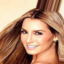

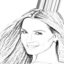

0


In [11]:
import cv2
import pandas as pd
import torchvision.transforms as transforms
from PIL import Image
from matplotlib.pyplot import imshow




EXCEL_PATH = "E:\Lucru\Dizertatie\Cod\Face_Synthesis\Database\celebA_medium.xlsx"
DATASET_PATH = "E:\Lucru\Dizertatie\Cod\Face_Synthesis\Database\medium_dataset\\"
SKETCH_DATASET_PATH = "E:\Lucru\Dizertatie\Cod\Face_Synthesis\Database\medium_dataset_sketch\\"

resize =  transforms.Compose([
                            transforms.ToPILImage(),
                            transforms.Resize([64,64])])

transf = transforms.Compose([
                            transforms.ToPILImage(),
                            transforms.Resize([64,64]),
                            transforms.ToTensor()])

transf_sketch = transforms.Compose([
                            transforms.ToPILImage(),
                            transforms.Resize([64,64]),
                            transforms.ToTensor(),
                            transforms.Grayscale(1)])

df = pd.read_excel(EXCEL_PATH)
data = df["image_id"]
labels = df["Male"]
index = 0


# 25 - nice female
# 31 - male

base_path = DATASET_PATH
img = cv2.imread(DATASET_PATH + data[index])
# img = cv2.imread('E:\Lucru\Dizertatie\Cod\Image-to-Sketch\source\\lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

sketch_img = cv2.imread(SKETCH_DATASET_PATH + data[index])
# sketch_img = cv2.imread('E:\Lucru\Dizertatie\Cod\Image-to-Sketch\destination\\lena.jpg')
sketch_img = cv2.cvtColor(sketch_img, cv2.COLOR_BGR2RGB)

batch_data = img
batch_data = transf(batch_data)

batch_sketch_data = sketch_img
batch_sketch_data = transf_sketch(batch_sketch_data)

pil_img = resize(img)
pil_img_sketch = resize(sketch_img)
display(pil_img)
display(pil_img_sketch)
print(labels[index])



ic| labels.shape: torch.Size([1])
ic| embedded_labels.shape: torch.Size([1, 50, 1, 1])
ic| embedded_labels.shape: torch.Size([1, 50, 2, 2])
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 64, 64])


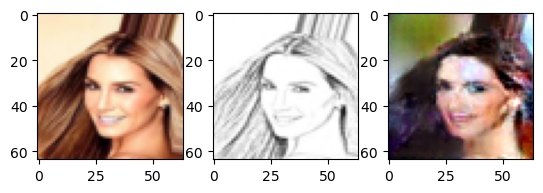

In [14]:
from discriminator import Discriminator
from generator import Generator

retea_G = Generator(img_size=1)
retea_D = Discriminator(64)

retea_D.load_state_dict(torch.load('E:\Lucru\Dizertatie\Cod\Face_Synthesis\Stage3_Sketch2Face\checkpoints\\retea_D_2_30epoci.pt'))
retea_G.load_state_dict(torch.load('E:\Lucru\Dizertatie\Cod\Face_Synthesis\Stage3_Sketch2Face\checkpoints\\retea_G_2_30epoci.pt'))



esantioane_proba = torch.stack([batch_sketch_data], dim=0)
etichete_proba = torch.LongTensor([0])

random_x = torch.randn(1, 1, 64, 64)


imagini_generate = retea_G(esantioane_proba, etichete_proba).detach()
imagini_generate = torch.squeeze(imagini_generate, 0)
print(imagini_generate.shape)

# plt.figure()
# plt.title("Imagini generate")
# plt.imshow(np.transpose(imagini_generate,(1,2,0)))
# plt.show()

plt.subplot(1, 3, 1)
imshow(np.asarray(pil_img))
plt.subplot(1, 3, 2)
imshow(np.asarray(pil_img_sketch))
plt.subplot(1, 3, 3)
plt.imshow(np.transpose(imagini_generate,(1,2,0)))
plt.show()


